<a href="https://colab.research.google.com/github/jiin124/Goyang_house_price_predict_BAproject/blob/main/%EA%B0%84%EB%8B%A8%ED%95%9C%EB%AA%A8%EB%8D%B8_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager,rc

font_path="/content/drive/MyDrive/NanumSquareB.ttf"
font=font_manager.FontProperties(fname=font_path)

In [ ]:
plt.rc('font',family='NanumBarunGothic')

In [ ]:
df=pd.read_csv('/content/Goyangdf (1).csv',encoding='cp949')
df.head()

,Column1,동,전용면적(㎡),계약년,계약월,건축년도,거래금액(만원),학원개수,대형마트 개수,병원개수,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,0,2,84.93,2021,3,2007,27000,61,0,0,...,0,16,17,0,28,35860,3,0,4,1334
1,1,2,59.99,2021,3,2007,26500,61,0,0,...,0,16,4,0,28,35860,3,0,4,1334
2,2,2,84.93,2021,3,2007,29700,61,0,0,...,0,16,10,0,28,35860,3,0,4,1334
3,3,2,59.99,2021,4,2007,26900,61,0,0,...,0,16,4,0,28,35860,3,0,4,1334
4,4,2,84.93,2021,4,2007,28000,61,0,0,...,0,16,2,0,28,35860,3,0,4,1334


In [ ]:
df.columns

Index(['Column1', '동', '전용면적(㎡)', '계약년', '계약월', '건축년도', '거래금액(만원)', '학원개수',
       '대형마트 개수', '병원개수', '스타벅스개수', '배스킨', '써브웨이', '편의점개수', '층', '집 유형',
       '어린이집/유치원', '공원면적', '도서관', '지하철역개수', '초/중/고', '반려동물등록수'],
      dtype='object')

In [ ]:
col=['동', '전용면적(㎡)', '계약년', '계약월', '건축년도', '학원개수',
       '대형마트 개수', '병원개수', '스타벅스개수', '배스킨', '써브웨이', '편의점개수', '층', '집 유형',
       '어린이집/유치원', '공원면적', '도서관', '지하철역개수', '초/중/고', '반려동물등록수']

In [ ]:
#from sklearn.preprocessing import StandardScaler

#st=StandardScaler()
#for i in col:
  #df[i]=st.fit_transform(df[i].values.reshape(-1,1))

#display(df.head())

,Column1,동,전용면적(㎡),계약년,계약월,건축년도,거래금액(만원),학원개수,대형마트 개수,병원개수,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,0,-1.790966,0.077855,-0.286079,-1.241898,0.240707,27000,-0.768541,-1.314931,-1.260302,...,-0.834445,-0.874687,1.264430,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
1,1,-1.790966,-0.259941,-0.286079,-1.241898,0.240707,26500,-0.768541,-1.314931,-1.260302,...,-0.834445,-0.874687,-0.516859,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
2,2,-1.790966,0.077855,-0.286079,-1.241898,0.240707,29700,-0.768541,-1.314931,-1.260302,...,-0.834445,-0.874687,0.305274,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
3,3,-1.790966,-0.259941,-0.286079,-0.889185,0.240707,26900,-0.768541,-1.314931,-1.260302,...,-0.834445,-0.874687,-0.516859,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
4,4,-1.790966,0.077855,-0.286079,-0.889185,0.240707,28000,-0.768541,-1.314931,-1.260302,...,-0.834445,-0.874687,-0.790904,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542


In [ ]:
#df.to_csv('scaled.csv')

In [ ]:
X=df.drop(['거래금액(만원)'],axis=1)
y=df['거래금액(만원)']

In [ ]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
for i in col:
  X[i]=st.fit_transform(X[i].values.reshape(-1,1))

display(X.head())

,Column1,동,전용면적(㎡),계약년,계약월,건축년도,학원개수,대형마트 개수,병원개수,스타벅스개수,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,0,-1.790966,0.077855,-0.286079,-1.241898,0.240707,-0.768541,-1.314931,-1.260302,-0.451665,...,-0.834445,-0.874687,1.264430,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
1,1,-1.790966,-0.259941,-0.286079,-1.241898,0.240707,-0.768541,-1.314931,-1.260302,-0.451665,...,-0.834445,-0.874687,-0.516859,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
2,2,-1.790966,0.077855,-0.286079,-1.241898,0.240707,-0.768541,-1.314931,-1.260302,-0.451665,...,-0.834445,-0.874687,0.305274,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
3,3,-1.790966,-0.259941,-0.286079,-0.889185,0.240707,-0.768541,-1.314931,-1.260302,-0.451665,...,-0.834445,-0.874687,-0.516859,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542
4,4,-1.790966,0.077855,-0.286079,-0.889185,0.240707,-0.768541,-1.314931,-1.260302,-0.451665,...,-0.834445,-0.874687,-0.790904,-0.595637,-0.639228,-0.750109,1.371694,-0.965959,-0.72989,-0.978542


In [ ]:
X.drop('Column1',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9908, 20)
(2478, 20)
(9908,)
(2478,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


rf=RandomForestRegressor(random_state=0,n_estimators=1000)

neg_mse_scores=cross_val_score(rf,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

In [ ]:
print('5 교차 검증의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 RMSE scores: [ 8176.79  9689.49  9151.87 13937.92 14749.7 ]
5 교차 검증의 평균 RMSE :11141.152


In [ ]:
print('5 교차 검증의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5 교차 검증의 평균 RMSE :11141.152


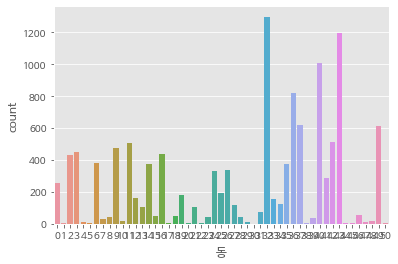

In [ ]:
sns.countplot(data=df,x='동')

In [ ]:
d=pd.read_csv('/content/고양시.csv',encoding='cp949')
d.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,층,집 유형,거래금액(만원),Unnamed: 12
0,경기도,고양덕양구,고양동,84.93,2021,3,2007.0,읍내로 25,4128111600,17,아파트,"27,000",*주택의 전용면적은 연면적으로 기재
1,경기도,고양덕양구,고양동,59.99,2021,3,2007.0,읍내로 25,4128111600,4,아파트,"26,500",NaN
2,경기도,고양덕양구,고양동,84.93,2021,3,2007.0,읍내로 25,4128111600,10,아파트,"29,700",NaN
3,경기도,고양덕양구,고양동,59.99,2021,4,2007.0,읍내로 25,4128111600,4,아파트,"26,900",NaN
4,경기도,고양덕양구,고양동,84.93,2021,4,2007.0,읍내로 25,4128111600,2,아파트,"28,000",NaN


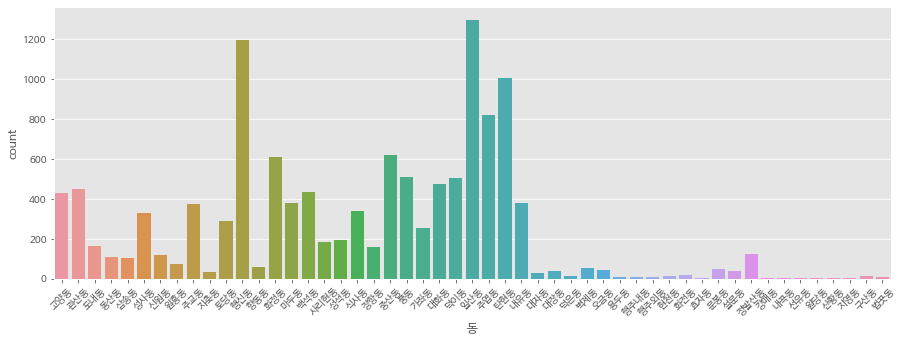

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(data=d,x='동')

In [ ]:
df.columns

Index(['Column1', '동', '전용면적(㎡)', '계약년', '계약월', '건축년도', '거래금액(만원)', '학원개수',
       '대형마트 개수', '병원개수', '스타벅스개수', '배스킨', '써브웨이', '편의점개수', '층', '집 유형',
       '어린이집/유치원', '공원면적', '도서관', '지하철역개수', '초/중/고', '반려동물등록수'],
      dtype='object')

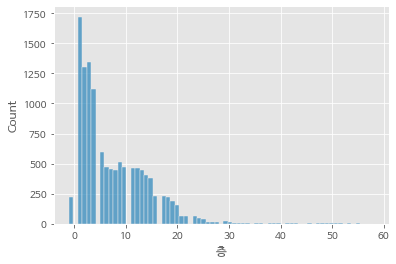

In [ ]:
sns.histplot(data=df,x='층')

'층', '집 유형',

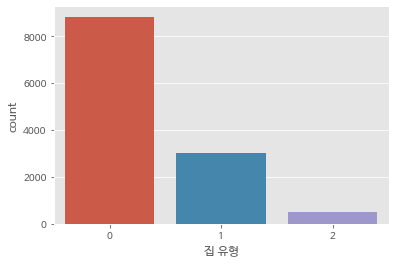

In [ ]:
sns.countplot(data=df,x='집 유형')

In [ ]:
col=['학원개수',
       '대형마트 개수', '병원개수', '스타벅스개수', '배스킨', '써브웨이', '편의점개수', 
       '어린이집/유치원', '도서관', '지하철역개수', '초/중/고']

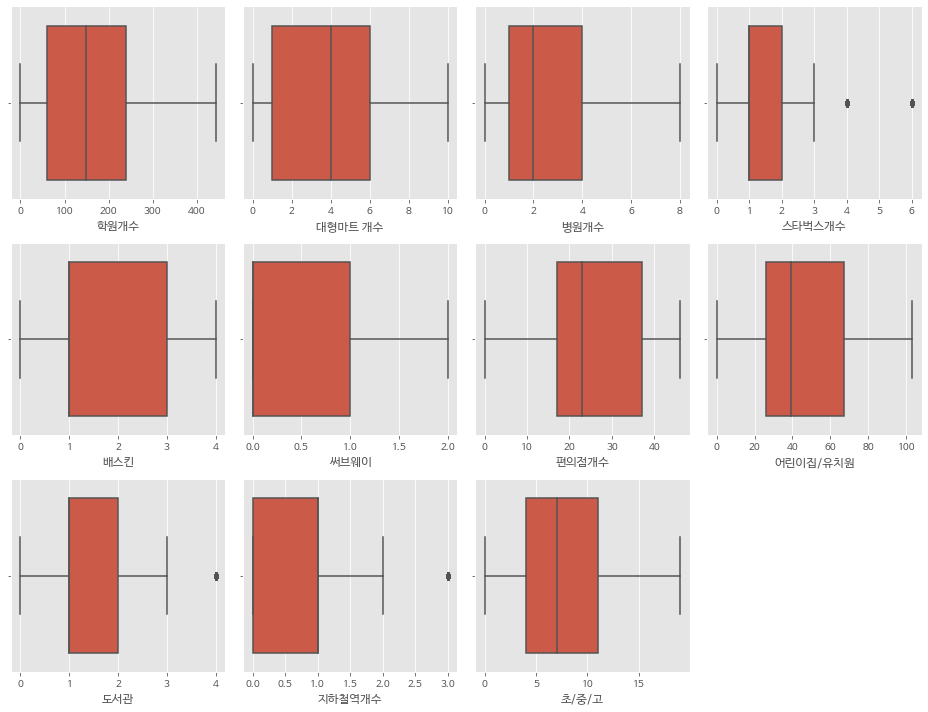

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(13,10))
for i,colName in enumerate(col):
  plt.subplot(3,4,i+1)
  sns.boxplot(df.loc[:,colName])
plt.tight_layout()
plt.show()

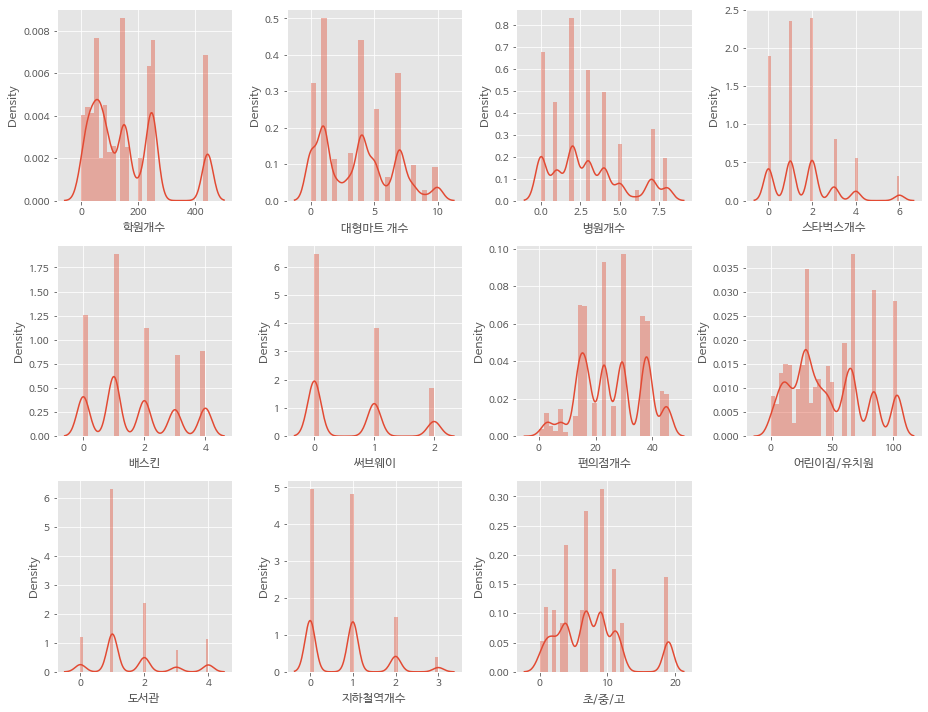

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(13,10))
for i,colName in enumerate(col):
  plt.subplot(3,4,i+1)
  sns.distplot(df.loc[:,colName])
plt.tight_layout()
plt.show()

In [ ]:
col=[ '공원면적', '반려동물등록수']

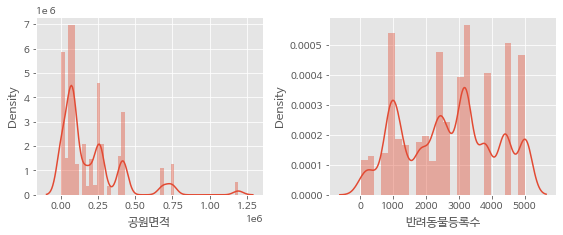

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,6))
for i,colName in enumerate(col):
  plt.subplot(2,3,i+1)
  sns.distplot(df.loc[:,colName])
plt.tight_layout()
plt.show()

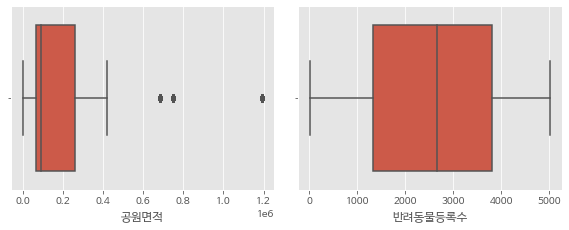

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,6))
for i,colName in enumerate(col):
  plt.subplot(2,3,i+1)
  sns.boxplot(df.loc[:,colName])
plt.tight_layout()
plt.show()

In [ ]:
df.drop('Column1',axis=1,inplace=True)

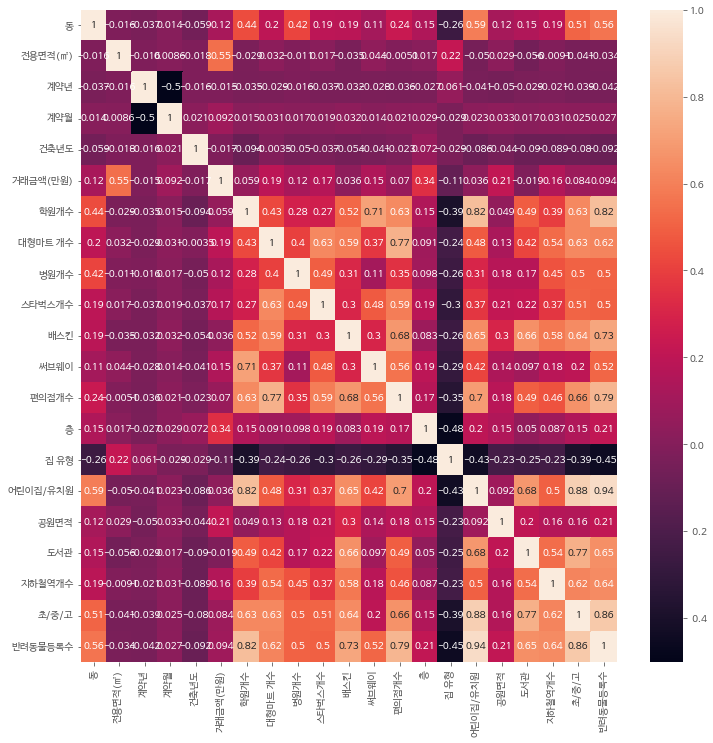

In [ ]:

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)